In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')

In [78]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
titanic = pd.read_csv('train.csv')

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
flights = sns.load_dataset('flights')

In [83]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [6]:
iris = sns.load_dataset('iris')

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1. Scatterplot (Numeical-Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

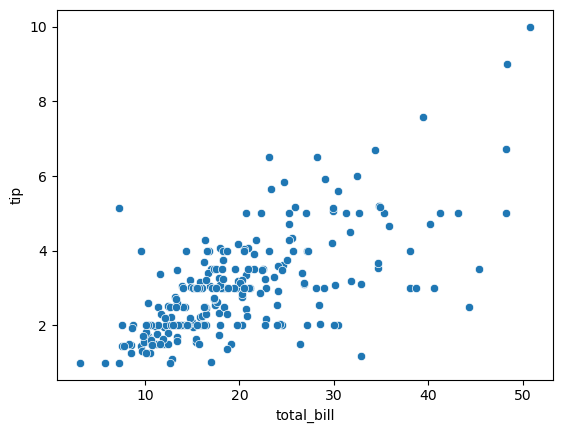

In [53]:
sns.scatterplot(data=tips, x="total_bill", y="tip")

<Axes: xlabel='total_bill', ylabel='tip'>

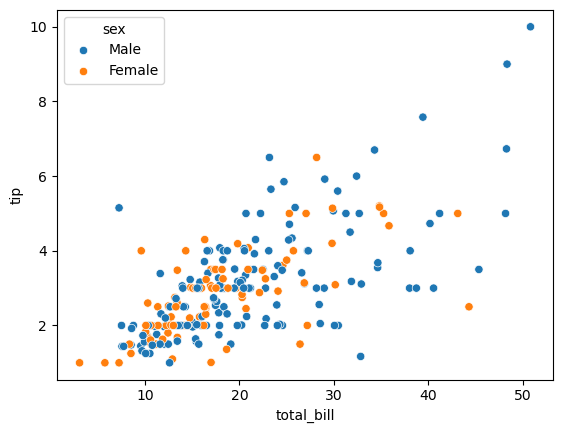

In [50]:
sns.scatterplot(data=tips, x="total_bill", y="tip",hue="sex")

<Axes: xlabel='total_bill', ylabel='tip'>

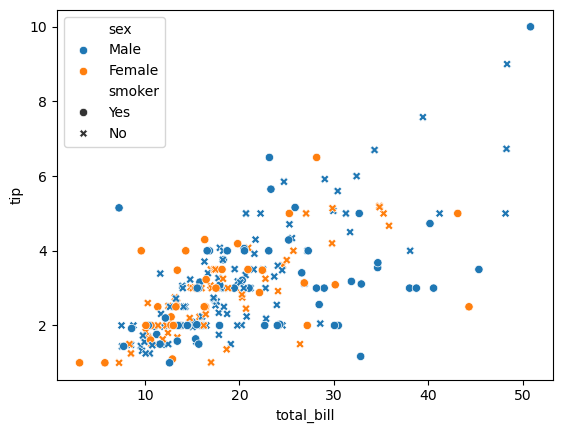

In [51]:
sns.scatterplot(data=tips, x="total_bill", y="tip",hue="sex",style="smoker")

<Axes: xlabel='total_bill', ylabel='tip'>

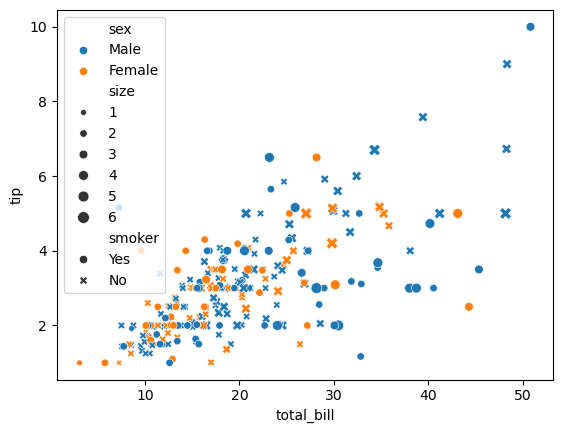

In [52]:
sns.scatterplot(data=tips, x="total_bill", y="tip",hue="sex",style="smoker",size="size")

# 2 .Barplot(Numerical-Catagocical)

<Axes: xlabel='Pclass', ylabel='Age'>

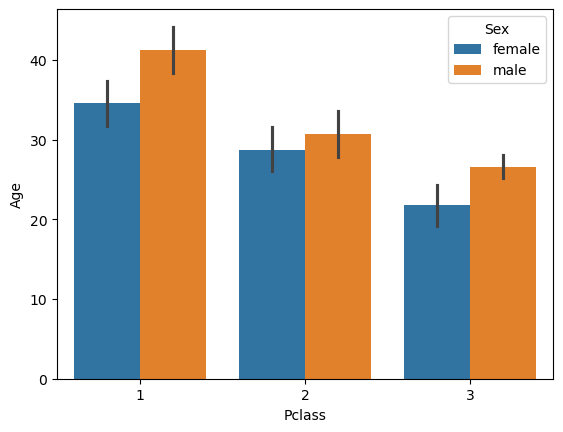

In [24]:
sns.barplot(data=titanic,x='Pclass',y='Age',hue="Sex")

<Axes: xlabel='Pclass', ylabel='Fare'>

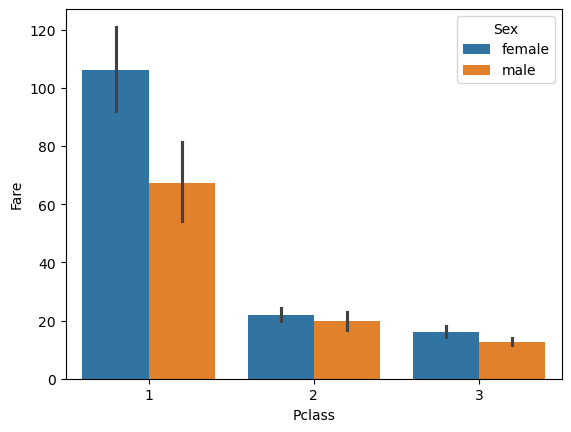

In [22]:
sns.barplot(data=titanic,x='Pclass',y='Fare',hue ="Sex")

# 3. Boxplot (Numerical - Catagorical)

<Axes: xlabel='Sex', ylabel='Age'>

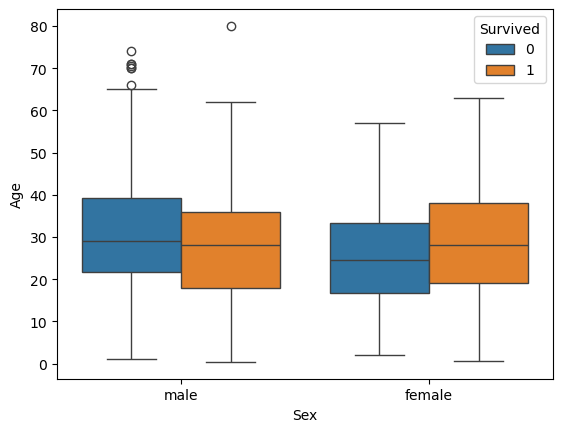

In [31]:
sns.boxplot(data=titanic, x="Sex", y="Age",hue='Survived')

# 4. Distplot (Numerical-catagorical)

C:\Users\itsri\AppData\Local\Temp\ipykernel_13892\3683906070.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic["Survived"]==0]["Age"],hist=False)
C:\Users\itsri\AppData\Local\Temp\ipykernel_13892\3683906070.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t

<Axes: xlabel='Age', ylabel='Density'>

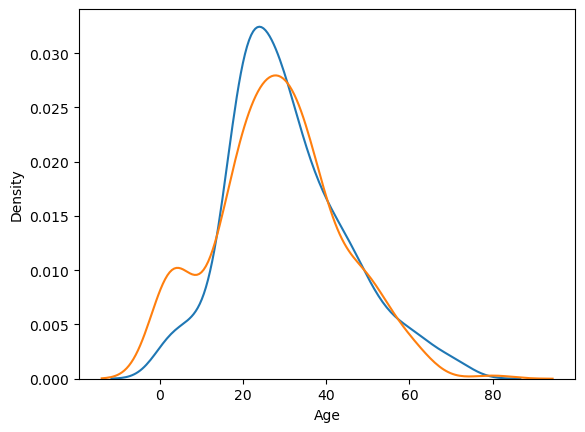

In [35]:
sns.distplot(titanic[titanic["Survived"]==0]["Age"],hist=False)
sns.distplot(titanic[titanic["Survived"]==1]["Age"],hist=False)

# 5 .HeatMap(Catagorical-catagorical)

In [38]:
pd.crosstab(titanic["Pclass"],titanic["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

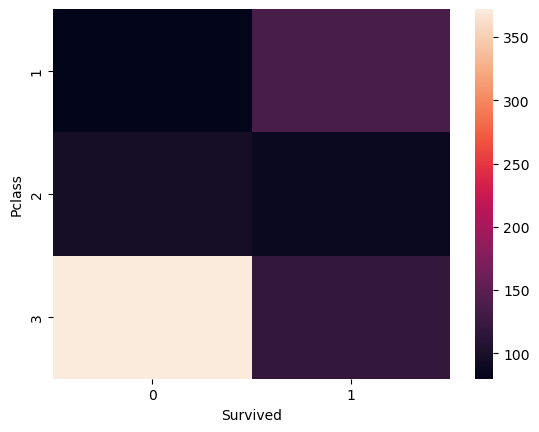

In [39]:
sns.heatmap(pd.crosstab(titanic["Pclass"],titanic["Survived"]))

In [56]:
titanic.groupby("Pclass").mean(numeric_only=True)['Survived']*100

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [63]:
titanic.groupby("Sex").mean(numeric_only=True)['Survived']*100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [65]:
titanic.groupby("Embarked").mean(numeric_only=True)['Survived']*100

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64

In [66]:
pd.crosstab(titanic.groupby("Pclass").mean(numeric_only=True)["Survived"]*100,titanic["Pclass"])

Pclass,1,3
Survived,,
24.236253,1,0
47.282609,0,1
62.962963,1,0


<Axes: xlabel='Pclass'>

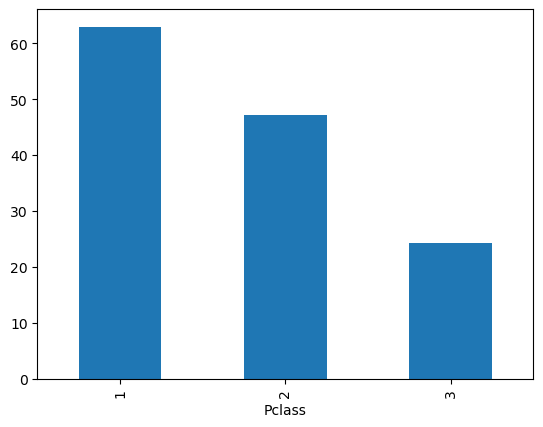

In [67]:
(titanic.groupby("Pclass").mean(numeric_only=True)['Survived']*100).plot(kind='bar')

# 6. ClusterMap (Catagorical-Catagorical)

In [69]:
pd.crosstab(titanic['Parch'],titanic['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


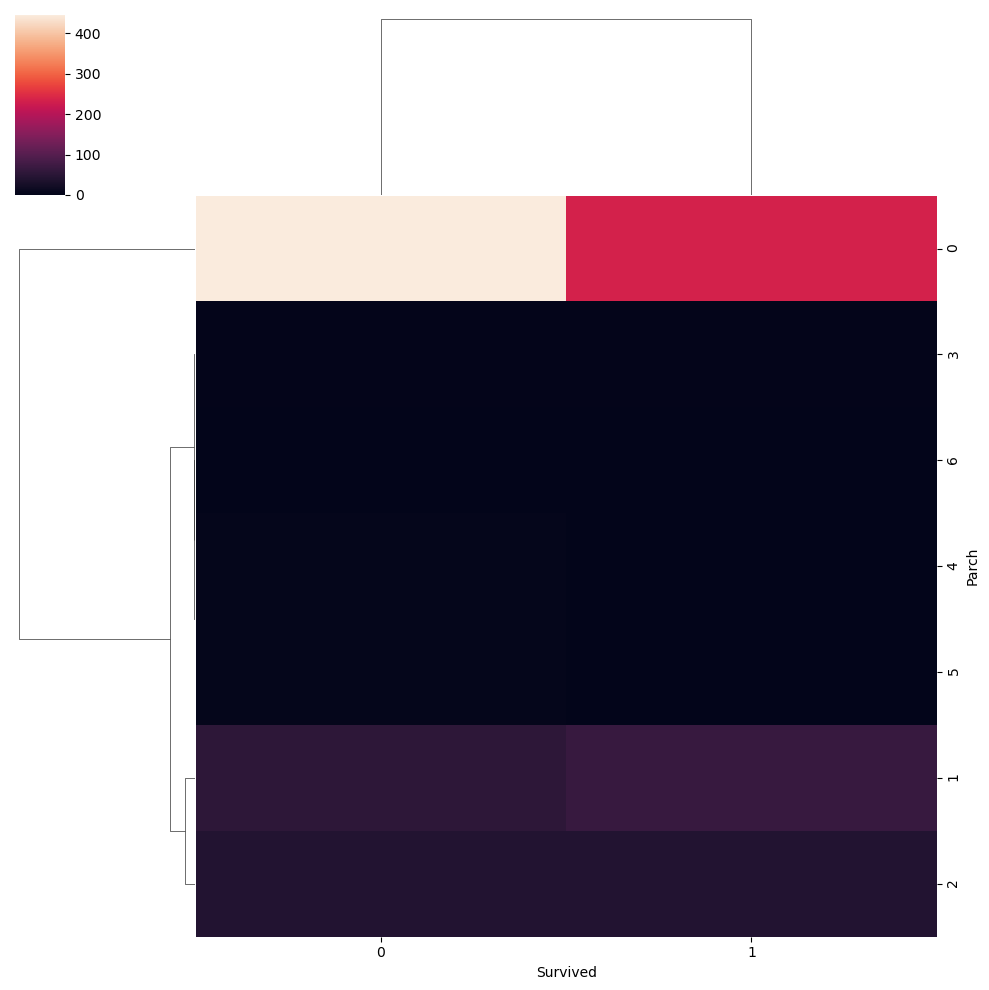

In [71]:
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']))

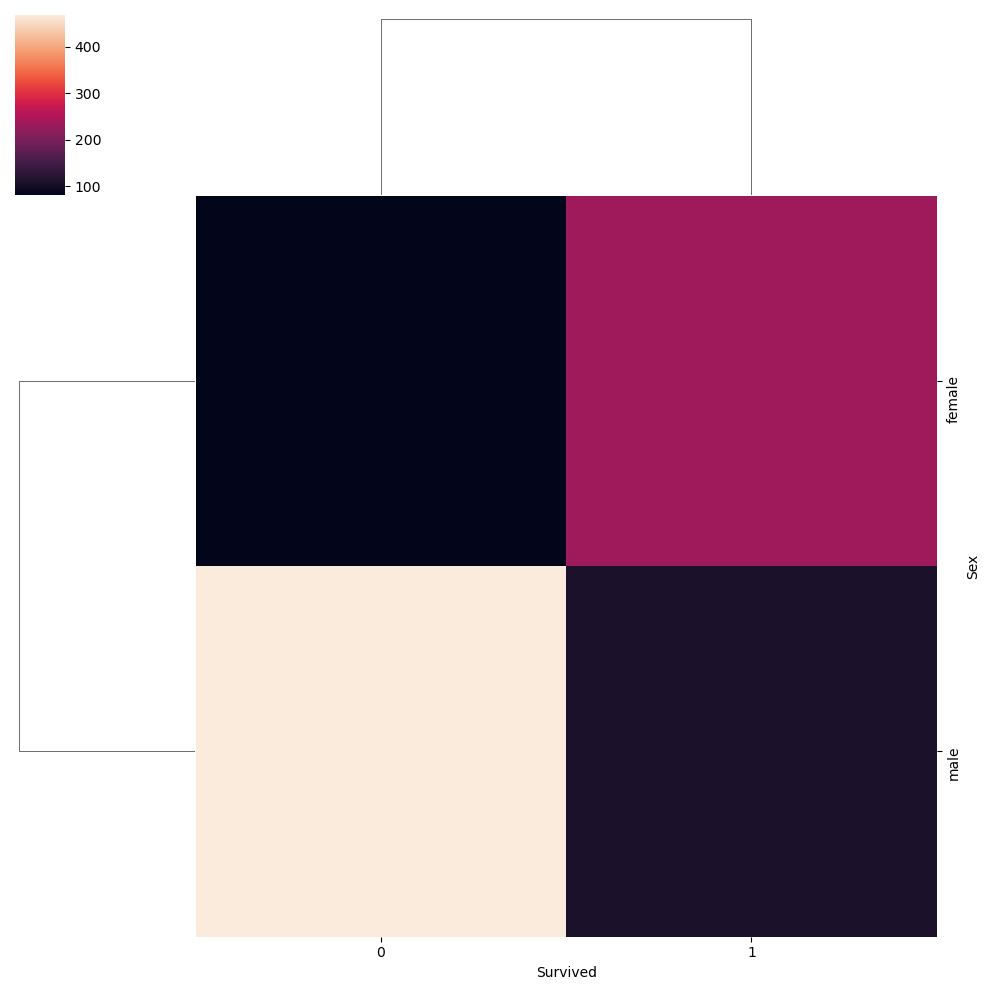

In [72]:
sns.clustermap(pd.crosstab(titanic['Sex'],titanic['Survived']))

# 7. Pairplot

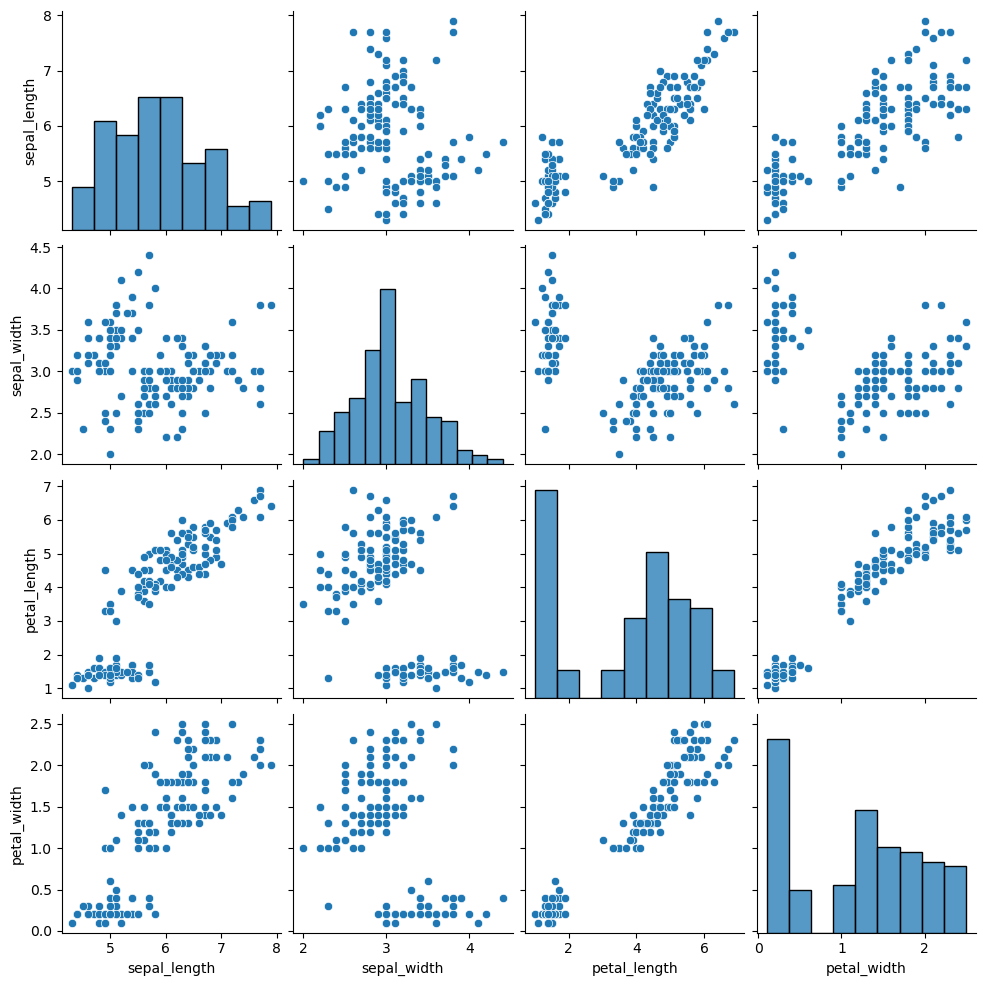

In [73]:
sns.pairplot(iris)

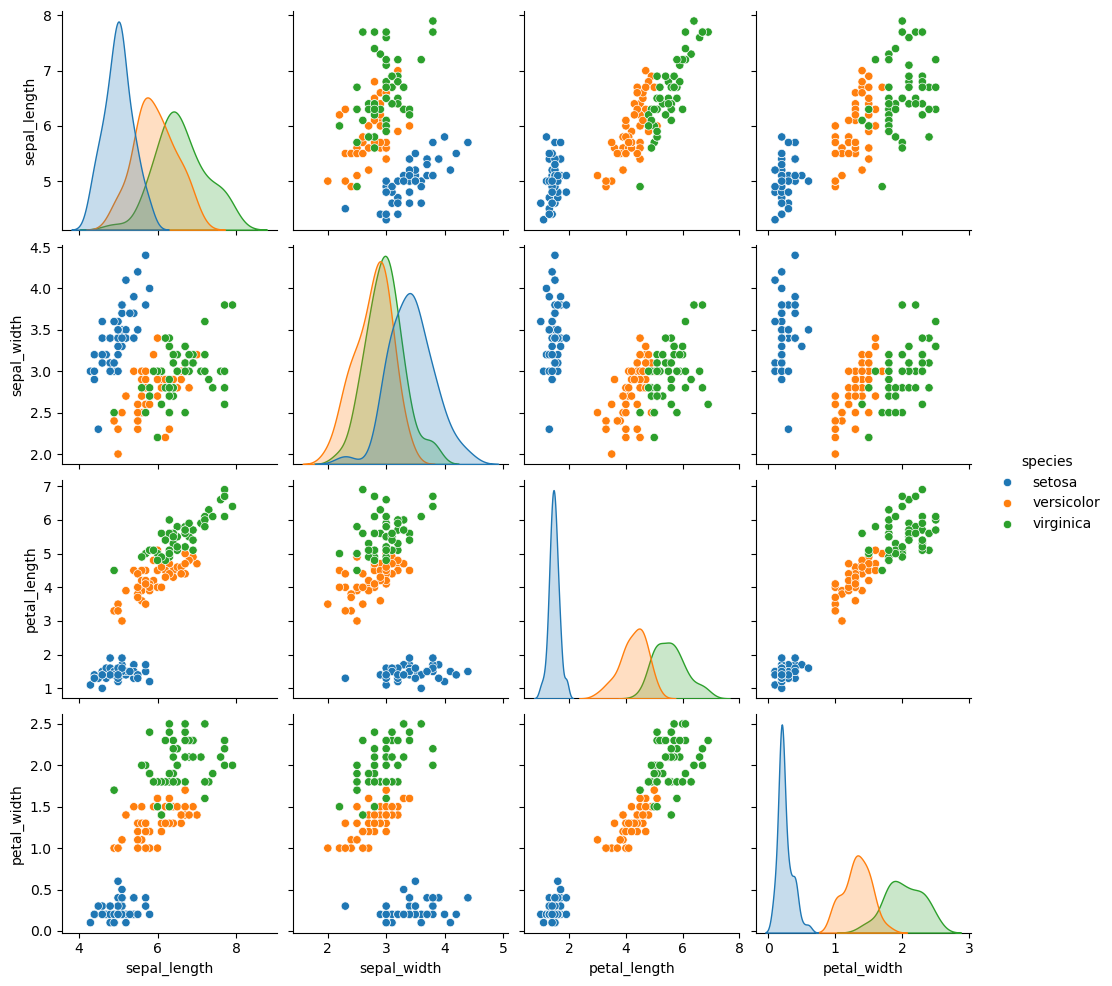

In [74]:
sns.pairplot(iris,hue="species")

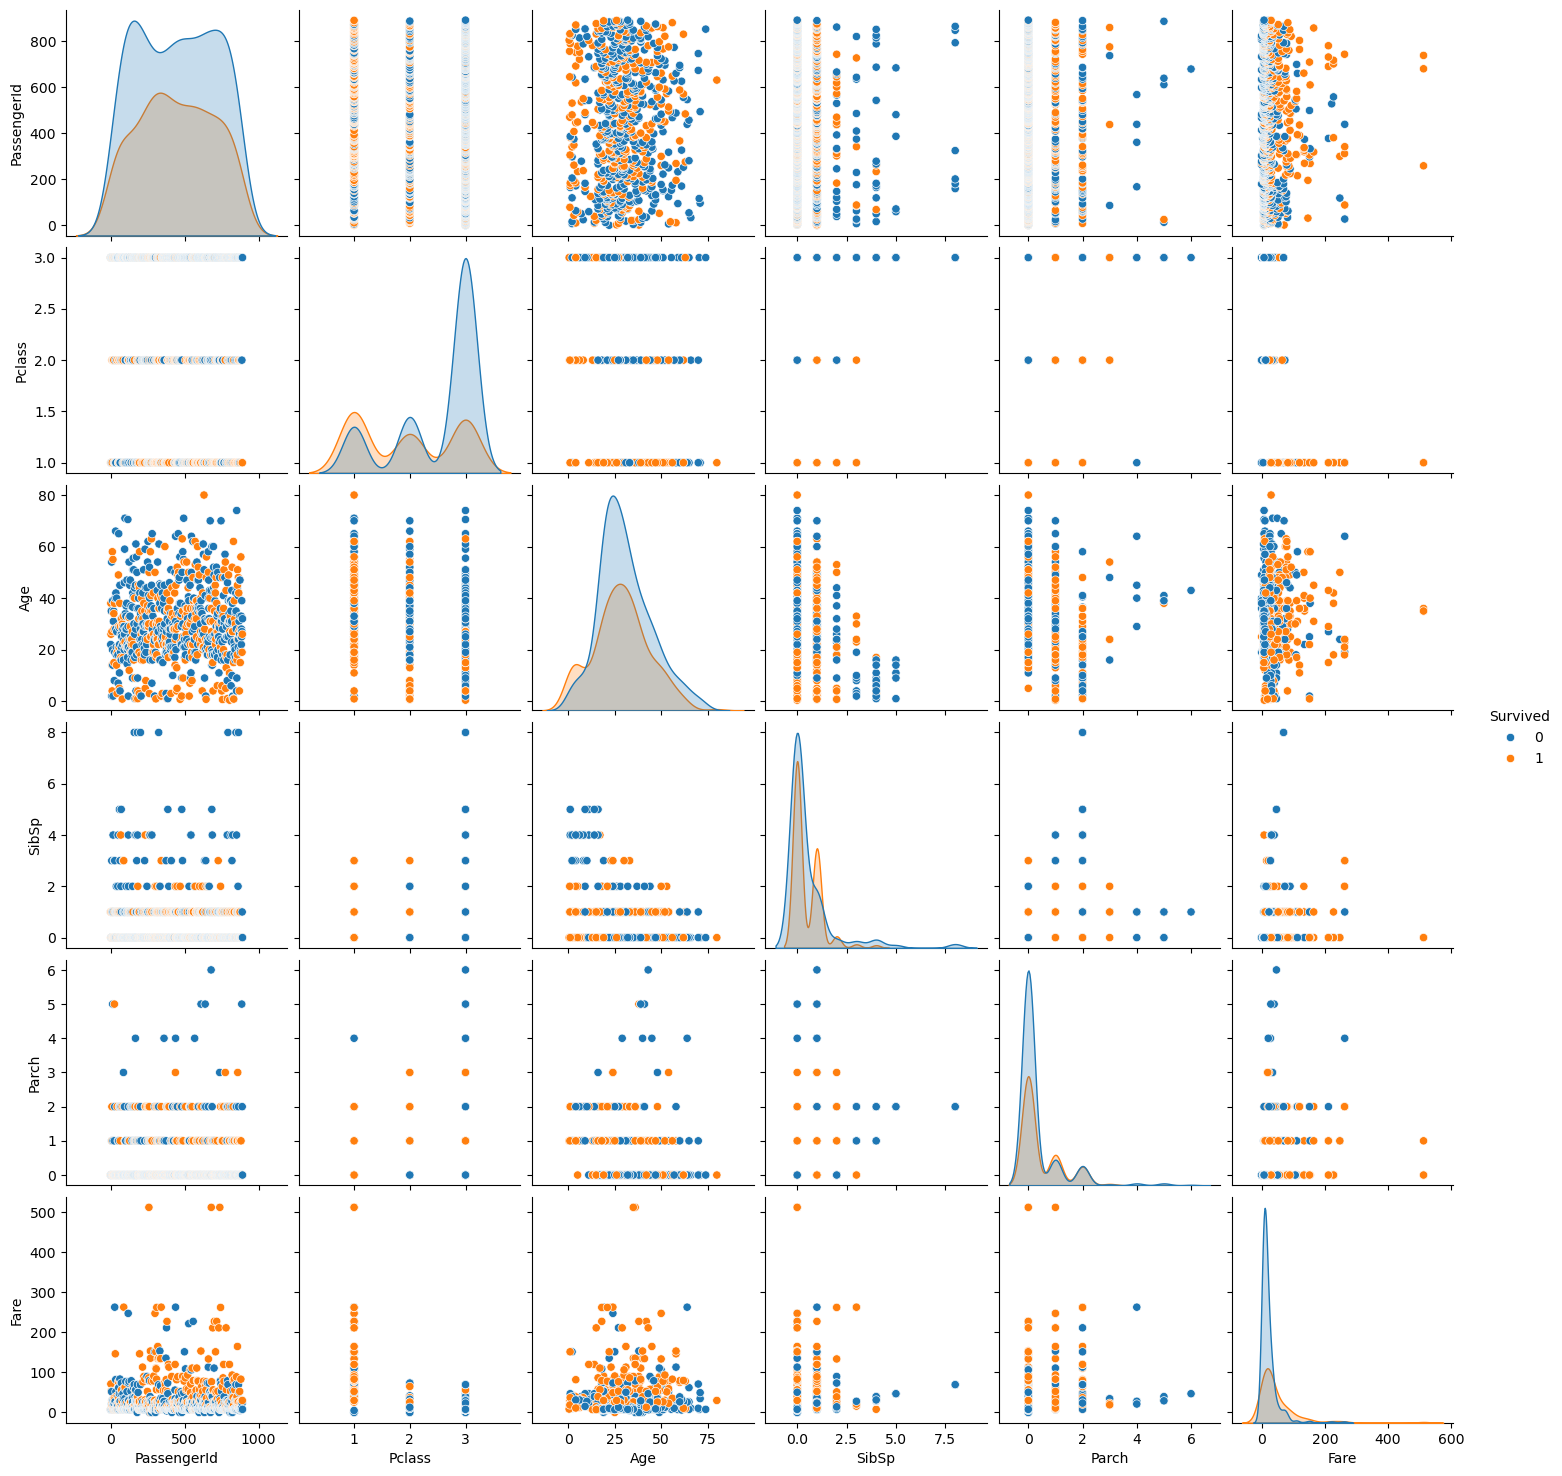

In [76]:
sns.pairplot(titanic,hue="Survived")

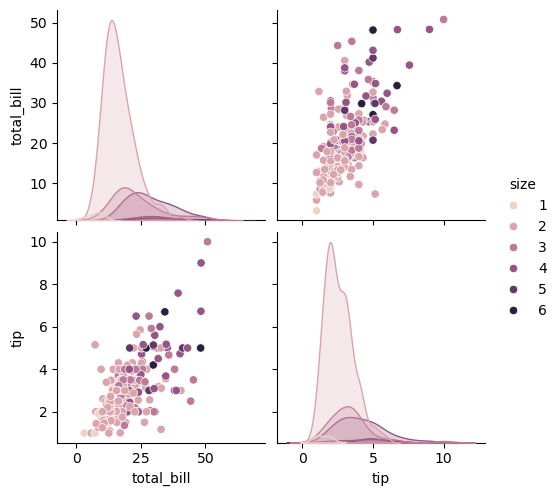

In [80]:
sns.pairplot(tips,hue="size")

# 8. Lineplot (Numerical-Numerical)

In [92]:
new = flights.groupby('year').sum(numeric_only=True)
new.reset_index()

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

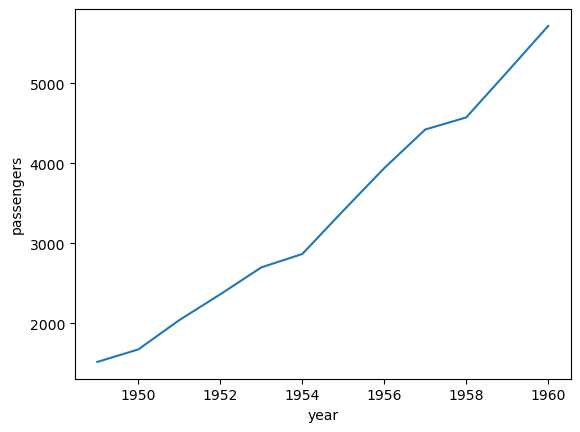

In [95]:
sns.lineplot(data=new,x='year',y='passengers')

In [98]:
flights.pivot_table(values='passengers',index='month',columns='year')

C:\Users\itsri\AppData\Local\Temp\ipykernel_13892\2056291100.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(values='passengers',index='month',columns='year')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


C:\Users\itsri\AppData\Local\Temp\ipykernel_13892\2230379170.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))


<Axes: xlabel='year', ylabel='month'>

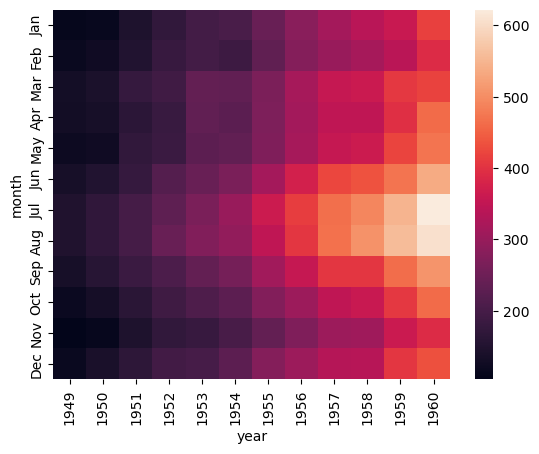

In [99]:
sns.heatmap(flights.pivot_table(values='passengers',index='month',columns='year'))

C:\Users\itsri\AppData\Local\Temp\ipykernel_13892\1868718285.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))


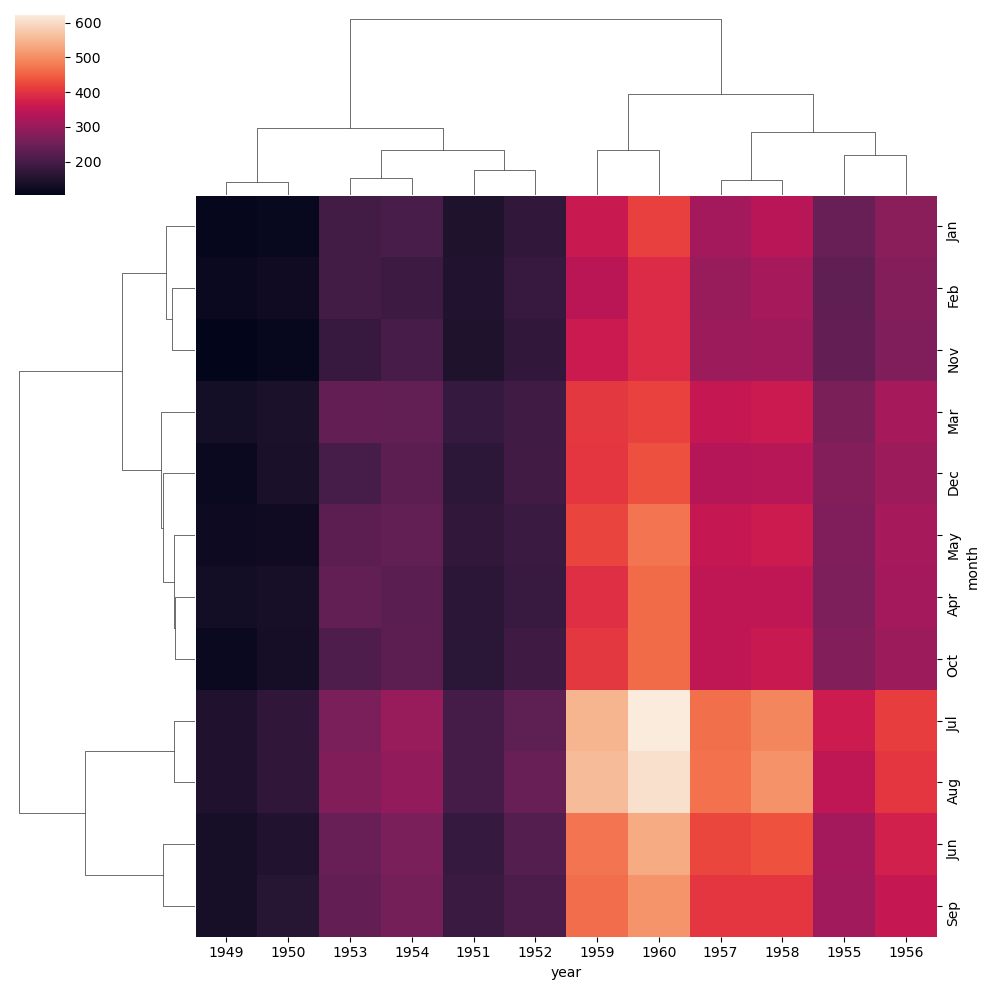

In [100]:
sns.clustermap(flights.pivot_table(values='passengers',index='month',columns='year'))